Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df_city_bikes = pd.read_csv('../data/city_bikes.csv')
df_city_bikes

,Unnamed: 0,station name,empty slots,available bikes,latitude,longitude
0,0,01. Curtatone,16,0,43.321600,11.327948
1,1,02. S. Agostino,10,0,43.314554,11.331021
2,2,03. S. Girolamo,6,0,43.316539,11.337212
3,3,04. Fortezza,10,0,43.320523,11.323225
4,4,05. Antiporto,10,0,43.328983,11.321913
5,5,06. Due Ponti,8,4,43.317187,11.354256
6,6,07. Napoli,4,2,43.341757,11.305010
7,7,08. Ospedale,14,0,43.343243,11.326733
8,8,09. Acquacalda,9,1,43.336999,11.300975
9,9,10. Ravacciano,9,1,43.323781,11.338891


In [49]:
df_foursquare_yelp = pd.read_csv('../data/foursquare_yelp.csv')
df_foursquare_yelp

,Unnamed: 0,station name,name,address,category,rating,review count
0,0,01. Curtatone,Pizzeria Alle Scalette,Viale Curtatone 18,Pizzeria,NaN,NaN
1,1,01. Curtatone,Piazza Giacomo Matteotti,Piazza Giacomo Matteotti,Plaza,NaN,NaN
2,2,01. Curtatone,Basilica di San Domenico,Piazza San Domenico,Church,NaN,NaN
3,3,01. Curtatone,Caffè La Piazzetta,Via Montanini 52,"Bar, Café, Italian Restaurant",NaN,NaN
4,4,01. Curtatone,Consorzio Agrario di Siena,Via Pianigiani Giuseppe 9,Grocery Store,NaN,NaN
...,...,...,...,...,...,...,...
226,378,16. Frajese,BAR Il Barrino,"Str. Massetana Romana, 5",Bars,5.0,2.0
227,379,16. Frajese,BAR dei Mantellini di Melani Fabiola,"Via Piano dei Mantellini, 22",Bars,5.0,1.0
228,402,18. Tufi,Antica Salumeria Salvini Ciofi Soccol e Zanolli,"Str. Statale 73 Ponente, 46",NaN,3.0,1.0
229,403,18. Tufi,Il Tocco,Via Cassia Sud 122,"Pizza, Cafes, Tuscan",4.0,2.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [50]:
df_merge = pd.merge(df_foursquare_yelp, df_city_bikes, on='station name')
df_merge.columns


Index(['Unnamed: 0_x', 'station name', 'name', 'address', 'category', 'rating',
       'review count', 'Unnamed: 0_y', 'empty slots', 'available bikes',
       'latitude', 'longitude'],
      dtype='object')

In [51]:
# remove the unused columns
df_merge = df_merge.drop('Unnamed: 0_x', axis=1)

In [52]:
df_merge = df_merge.drop('Unnamed: 0_y', axis=1)

In [53]:
df_merge.shape

(231, 10)

Find out more about the data using descriptive statistics. Descriptive statistics gives a way of giving a brief overview of the dataset we are dealing with, including some measures and features of the sample
Consider grouping data (basic grouping with group by)
Consider plotting data columns to find out how the data in the columns are distributed
Consider creating scatter plots to explore the relationships between two numerical columns
Conduct a hypothesis test against a hypothesis based on your understanding or observation of the data
Consider exploring correlations among different variables (different columns)

In [54]:
# Find out more about the data using descriptive statistics.
df_merge.describe()

,rating,review count,empty slots,available bikes,latitude,longitude
count,60.000000,60.000000,231.000000,231.000000,231.000000,231.000000
mean,4.183333,11.966667,8.917749,1.393939,43.326121,11.325023
std,0.892372,13.643110,3.784084,2.113262,0.012970,0.012331
min,1.000000,1.000000,2.000000,0.000000,43.296856,11.300975
25%,4.000000,1.750000,6.000000,0.000000,43.316863,11.321913
50%,4.500000,6.000000,9.000000,0.000000,43.323781,11.326733
75%,5.000000,17.250000,11.000000,2.000000,43.336999,11.332998
max,5.000000,62.000000,16.000000,8.000000,43.347800,11.354256


Note:
- The overall rating is quite good > 4.0
- The number of free bikes at each station is low ~ 1.3
  

<Axes: xlabel='rating', ylabel='Count'>

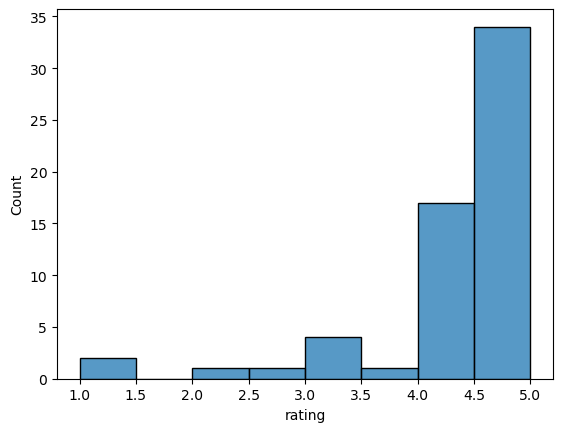

In [55]:
# histogram
sns.histplot(df_merge['rating'])

In [56]:
sorted(list(df_merge.columns))

['address',
 'available bikes',
 'category',
 'empty slots',
 'latitude',
 'longitude',
 'name',
 'rating',
 'review count',
 'station name']

In [57]:
df_merge.shape

(231, 10)

C:\Users\thong.lam\AppData\Local\Temp\ipykernel_9480\1275029778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merge.corr(), annot=True, cmap="tab20c")


<Axes: >

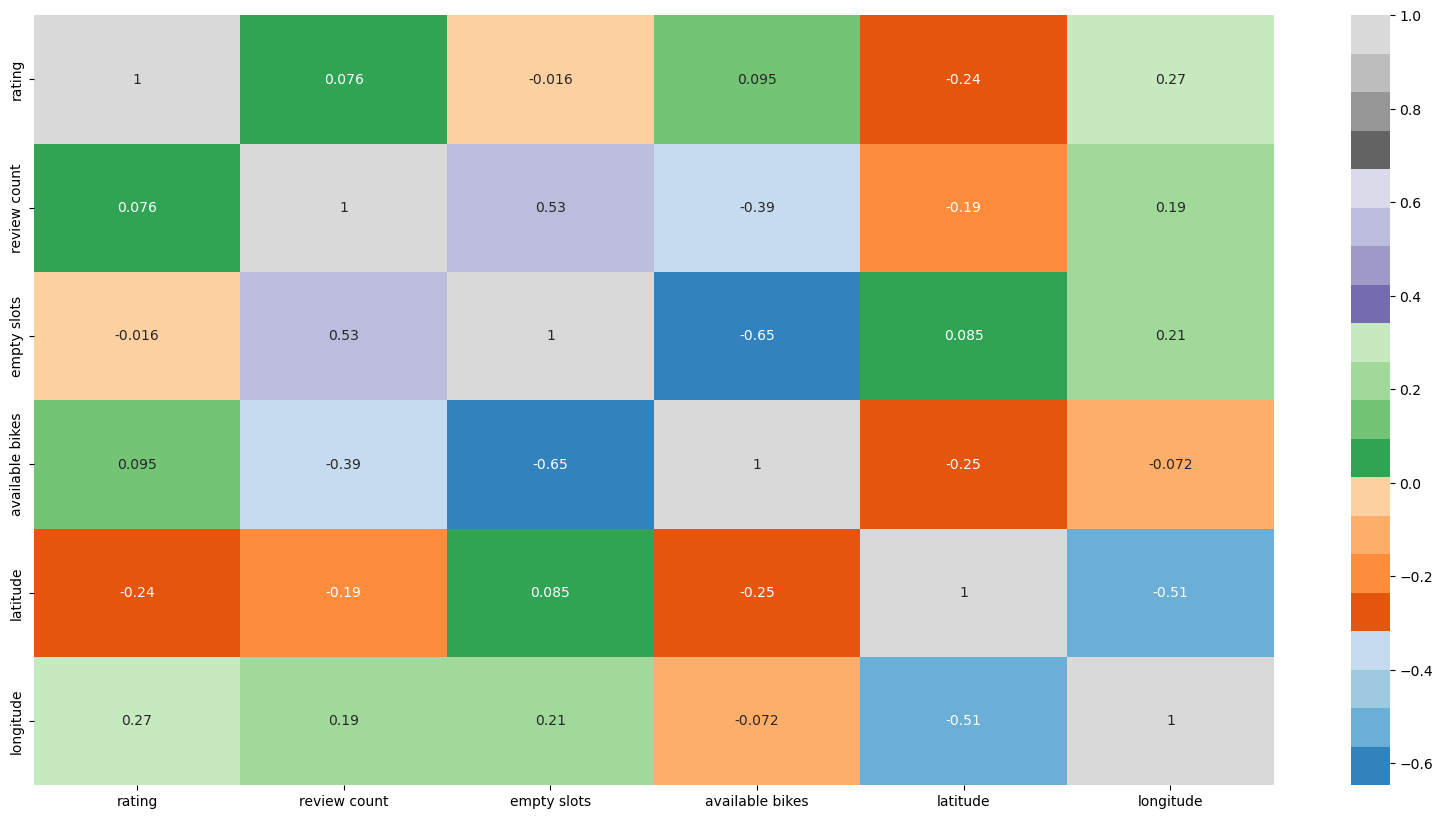

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df_merge.corr(), annot=True, cmap="tab20c")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [59]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Look at the data before and after the join to validate your data.

In [60]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [61]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [62]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station name     231 non-null    object 
 1   name             231 non-null    object 
 2   address          231 non-null    object 
 3   category         211 non-null    object 
 4   rating           60 non-null     float64
 5   review count     60 non-null     float64
 6   empty slots      231 non-null    int64  
 7   available bikes  231 non-null    int64  
 8   latitude         231 non-null    float64
 9   longitude        231 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 19.9+ KB


In [92]:
create_pois_table = """
CREATE TABLE IF NOT EXISTS pois (
  "station name" TEXT NOT NULL,
  name TEXT PRIMARY KEY,
  address TEXT,
  category TEXT,
  rating FLOAT,
  "review count" FLOAT,
  "empty slots" INTEGER,
  "available bikes" INTEGER,
  latitude FLOAT,
  longitude FLOAT
);
"""

In [93]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [94]:
execute_query(connection, create_pois_table)

Query executed successfully


In [95]:
df_merge.to_sql('pois', con=connection, if_exists='replace')

231

In [76]:
select_pois = "SELECT * from pois"
pois = execute_read_query(connection, select_pois)

for poi in pois:
    print(poi)